##예제
1. csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, trand_d_2)
2. tran_1과 tran_2는 단순한 행 추가 결합 (유니언 결합)
3. tran_d_1과 tran_d_2도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터 프레임을 특정 조건에 맞춰서 2번 데이터프레임 기준으로 열 추가 결합(조인 결합)
5. csv폴더에 있는 2개의 파일 로드(custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터프레임과 item_master 조인 결합
8. 결합이 된 데이터프레임에서 quantity컬럼과 item_price 컬럼의 데이터를 가지고 total_price라는 파생 변수를 생성(total_price = item_price * quantity)

In [2]:
import pandas as pd

In [3]:
tran1 = pd.read_csv("../csv/tran_1.csv")
tran2 = pd.read_csv("../csv/tran_2.csv")
trand1 = pd.read_csv("../csv/tran_d_1.csv")
trand2 = pd.read_csv("../csv/tran_d_2.csv")    

In [4]:
# tran1, tran2 유니언 결합
tran = pd.concat([tran1,tran2],axis=0,ignore_index=True)

In [5]:
# trand1, trand2 유니언 결합
trand = pd.concat([trand1,trand2],axis=0,ignore_index=True)

In [6]:
# tran과 trand를 조인 결합(조건 : transaction_id, how: tran)
tran = pd.merge(tran,trand,on='transaction_id',how='left')

In [7]:
# 2개 파일을 로드
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master = pd.read_csv("../csv/item_master.csv")

In [8]:
# tran, customer_master 조인 결합 (조건 : customer_id, how : inner, left)
total_df = pd.merge(tran, customer_master ,on='customer_id', how='inner')

In [9]:
# total_df , item_master 조인결합 (조건: item_id, how : inner)
total_df = pd.merge(total_df, item_master ,on='item_id', how='inner')
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000


In [10]:
# 새로운 파생변수 생성 total_price
# total_df['total_price'] = values
total_df['total_price'] = total_df['item_price']*total_df['quantity']

In [11]:
# 거래의 금액이 가장 좋은 아이템은 무엇인가?
group_data = total_df[['item_name','total_price']].groupby('item_name').sum()

In [12]:
# 내림차순 정렬
group_data.sort_values('total_price',ascending=False).index[0]

'PC-E'

In [13]:
origin_data = total_df.copy()

In [14]:
total_df['gender']

0       M
1       F
2       F
3       M
4       M
       ..
6064    M
6065    M
6066    M
6067    M
6068    M
Name: gender, Length: 6069, dtype: object

In [15]:
# loc를 이용하여 m,f를 변경
# m -> 남자, f -> 여자
total_df.loc[total_df['gender'] == "M",'gender'] = '남자'
total_df.loc[total_df['gender'] == "F",'gender'] = '여자'

In [16]:
total_df['gender'].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [17]:
# apply() 사용하여 남자, 여자 변경

def change(x):
    # x에는 M아니면 F
    if x == "F":
        result = "여자"
    else:
        result = "남자"
    return result

total_df['gender'].apply(change)        

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [18]:
origin_data['gender'].apply(lambda x :'남자' if(x == 'M') else 
                            ('여자'if(x == 'F') else '무응답'))

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [19]:
# payment_date 컬럼을 시계열 데이터 변경
# to_datetime()
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,남자,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [20]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'],format='%Y-%m-%d %H:%M:%S')

In [21]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name       6069 non-null   object        
 15  item

In [22]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime('%m-%Y')

In [23]:
#월별 거래량을 확인
total_df[['payment_month','total_price']].groupby('payment_month').sum()

,total_price
payment_month,
02-2019,136905000
03-2019,135695000
04-2019,135970000
05-2019,132750000
06-2019,138870000
07-2019,145850000


<Axes: xlabel='item_name'>

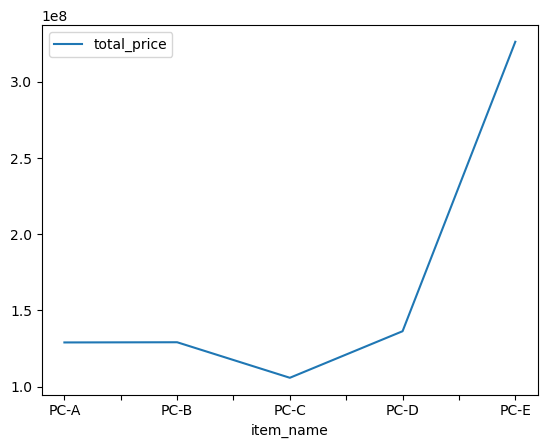

In [24]:
group_data.plot()

In [25]:
pivot_data = pd.pivot_table(
    total_df,
    index='payment_month',
    aggfunc=['sum','mean','min','max','std'],
    values= 'total_price'
)